In [142]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from numpy.linalg import eig
import warnings
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

#### **1. Load and explore dataset, do necessary pre-processing and split the dataset into training set and test set with an appropriate ratio. Explain the steps that you have taken (e.g. show dataset size, dealing with missing values, feature exploration and representation, label distribution, split dataset etc)**

In [143]:
#Load data
df = pd.read_csv('garments_worker_productivity.csv')

In [144]:
#Check dataset size
df.shape

(1197, 15)

In [145]:
#Get dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   date                   1197 non-null   object 
 1   quarter                1197 non-null   object 
 2   department             1197 non-null   object 
 3   day                    1197 non-null   object 
 4   team                   1197 non-null   int64  
 5   targeted_productivity  1197 non-null   float64
 6   smv                    1197 non-null   float64
 7   wip                    691 non-null    float64
 8   over_time              1197 non-null   int64  
 9   incentive              1197 non-null   int64  
 10  idle_time              1197 non-null   float64
 11  idle_men               1197 non-null   int64  
 12  no_of_style_change     1197 non-null   int64  
 13  no_of_workers          1197 non-null   float64
 14  actual_productivity    1197 non-null   float64
dtypes: f

Attribute Information:<br>

01 date : Date in MM-DD-YYYY<br>
02 day : Day of the Week<br>
03 quarter : A portion of the month. A month was divided into four quarters<br>
04 department : Associated department with the instance<br>
05 team_no : Associated team number with the instance<br>
06 no_of_workers : Number of workers in each team<br>
07 no_of_style_change : Number of changes in the style of a particular product<br>
08 targeted_productivity : Targeted productivity set by the Authority for each team for each day.<br>
09 smv : Standard Minute Value, it is the allocated time for a task<br>
10 wip : Work in progress. Includes the number of unfinished items for products<br>
11 over_time : Represents the amount of overtime by each team in minutes<br>
12 incentive : Represents the amount of financial incentive (in BDT) that enables or motivates a particular course of action.<br>
13 idle_time : The amount of time when the production was interrupted due to several reasons<br>
14 idle_men : The number of workers who were idle due to production interruption<br>
15 actual_productivity : The actual % of productivity that was delivered by the workers. It ranges from 0-1.<br>

Ref: https://www.kaggle.com/datasets/ishadss/productivity-prediction-of-garment-employees

In [146]:
#change team type from int64 to object
df['team'] = df['team'].apply(lambda x: str(x))

In [147]:
#Describe numerical data
df.describe()

,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
count,1197.000000,1197.000000,691.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000,1197.000000
mean,0.729632,15.062172,1190.465991,4567.460317,38.210526,0.730159,0.369256,0.150376,34.609858,0.735091
std,0.097891,10.943219,1837.455001,3348.823563,160.182643,12.709757,3.268987,0.427848,22.197687,0.174488
min,0.070000,2.900000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.233705
25%,0.700000,3.940000,774.500000,1440.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.650307
50%,0.750000,15.260000,1039.000000,3960.000000,0.000000,0.000000,0.000000,0.000000,34.000000,0.773333
75%,0.800000,24.260000,1252.500000,6960.000000,50.000000,0.000000,0.000000,0.000000,57.000000,0.850253
max,0.800000,54.560000,23122.000000,25920.000000,3600.000000,300.000000,45.000000,2.000000,89.000000,1.120437


In [148]:
#Print the first 5 lines of the dataset
df.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [149]:
#Check for null data
df.isnull().sum()

date                       0
quarter                    0
department                 0
day                        0
team                       0
targeted_productivity      0
smv                        0
wip                      506
over_time                  0
incentive                  0
idle_time                  0
idle_men                   0
no_of_style_change         0
no_of_workers              0
actual_productivity        0
dtype: int64

In [150]:
#fill null values in wip with 0 since there is no work in progress yet.
df['wip'].fillna(0, inplace=True)

In [151]:
df.isnull().sum()

date                     0
quarter                  0
department               0
day                      0
team                     0
targeted_productivity    0
smv                      0
wip                      0
over_time                0
incentive                0
idle_time                0
idle_men                 0
no_of_style_change       0
no_of_workers            0
actual_productivity      0
dtype: int64

In [152]:
#Check department column
df['department'].unique()

array(['sweing', 'finishing ', 'finishing'], dtype=object)

**There are some finishing department name with a space, we need to replace it with the corret one. And there seems to be a typo with 'sweing' which needs to be fixed.**

In [153]:
#replace 'finishing ' by 'finishing', and 'sweing' by 'sewing'
df['department'] = df['department'].apply(lambda x: 'finishing' if (x == 'finishing' or x == 'finishing ') else ('sewing'))

In [154]:
#Recheck department column after fixing typo
df['department'].unique()

array(['sewing', 'finishing'], dtype=object)

In [155]:
#Check the quarter column
df['quarter'].unique()

array(['Quarter1', 'Quarter2', 'Quarter3', 'Quarter4', 'Quarter5'],
      dtype=object)

In [156]:
#Check day column
df['day'].unique()

array(['Thursday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday'],
      dtype=object)

* **Let's do some exploration on the dataset**

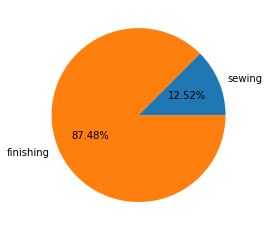

In [157]:
#How many workers in each department
plt.pie(df.groupby('department').sum()['no_of_workers'], labels = df['department'].unique(), autopct='%1.2f%%')
plt.show()

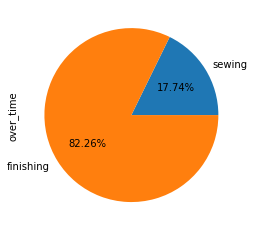

In [158]:
#In which department workers have to work more overtime
df.groupby('department').sum()['over_time'].plot(kind = 'pie', labels = df['department'].unique(), autopct = '%1.2f%%')
plt.show()


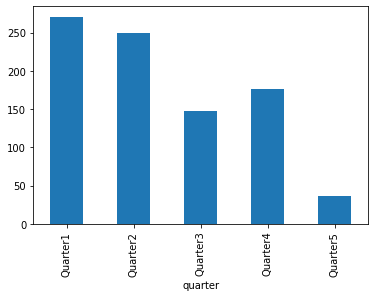

In [159]:
#Which quarter has the highest actual productivity
df.groupby('quarter').sum()['actual_productivity'].plot(kind = 'bar')
plt.show()

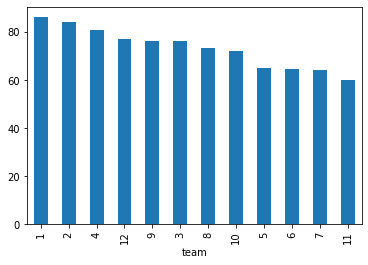

In [160]:
#Which team has the highest actual productivity
df.groupby('team').sum()['actual_productivity'].sort_values(ascending= False).plot(kind = 'bar')
plt.show()

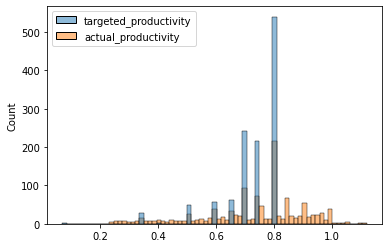

In [161]:
#how target_productivity compared to actual_productivity
sns.histplot(df[['targeted_productivity','actual_productivity']])
plt.show()

* **Finding Correlation and Significant Features**

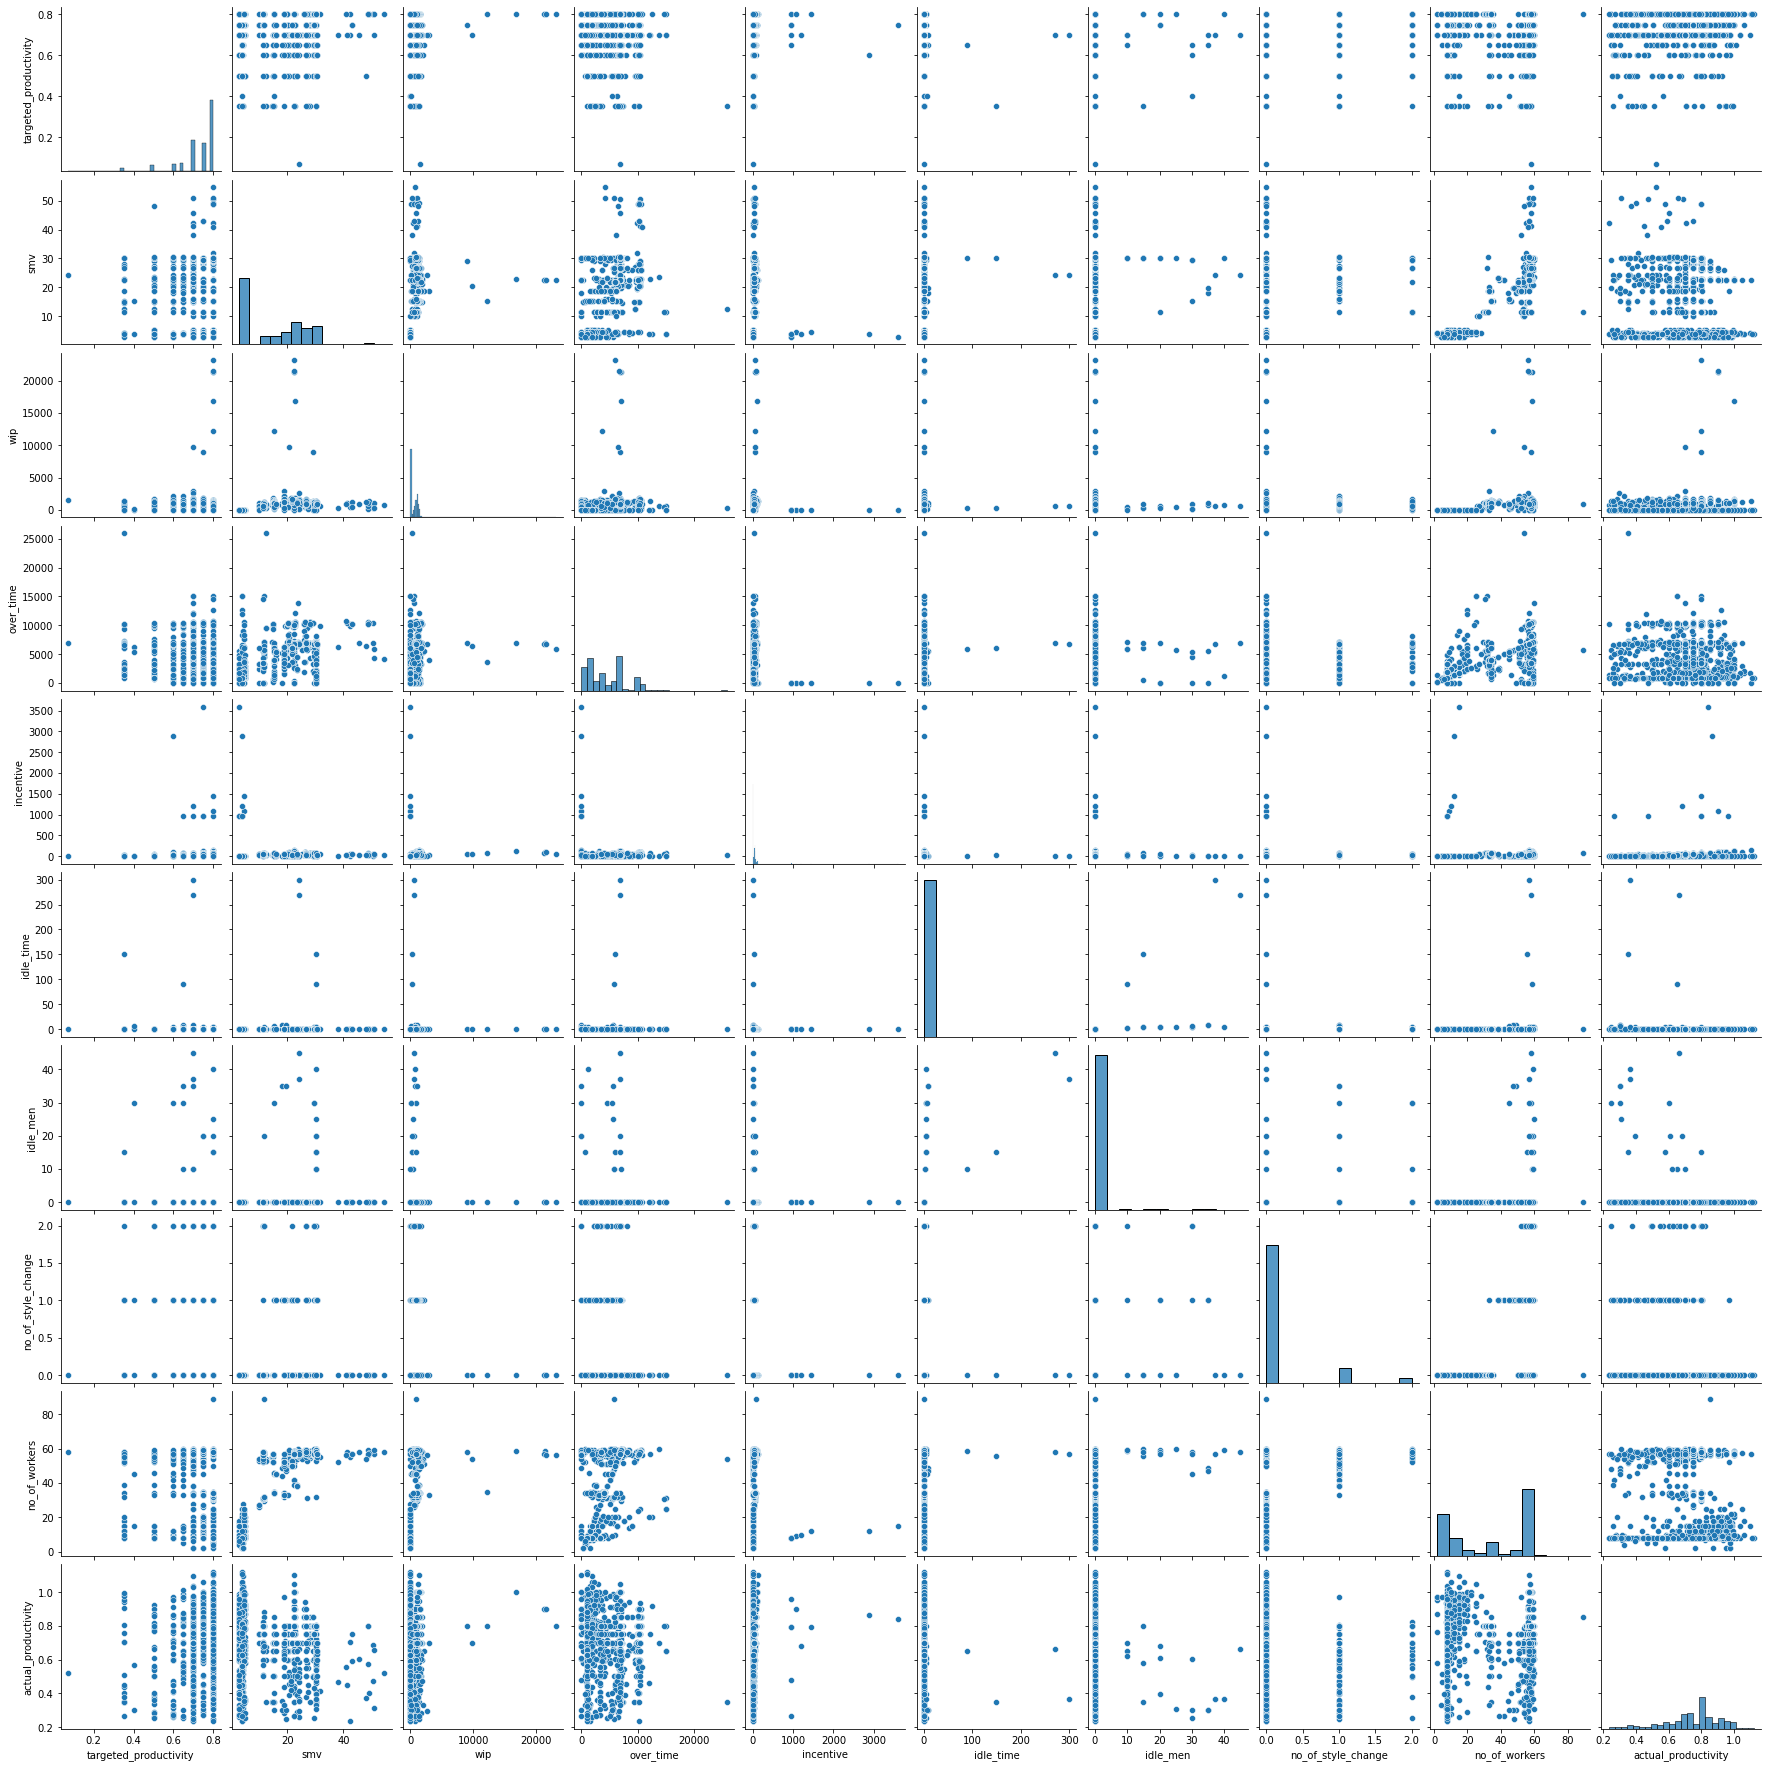

In [162]:
quantitative_data = df.select_dtypes(exclude=object)
sns.pairplot(quantitative_data)

In [163]:
#Check idle_time column
df['idle_time'].value_counts()

0.0      1179
3.5         3
2.0         2
5.0         2
8.0         2
4.5         2
4.0         2
90.0        1
150.0       1
270.0       1
300.0       1
6.5         1
Name: idle_time, dtype: int64

<Axes: ylabel='Frequency'>

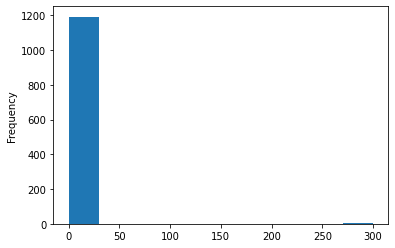

In [164]:
df['idle_time'].plot(kind = 'hist')

In [165]:
#check idle_men column
df['idle_men'].value_counts()

0     1179
10       3
15       3
30       3
20       3
35       2
45       1
37       1
25       1
40       1
Name: idle_men, dtype: int64

<Axes: ylabel='Frequency'>

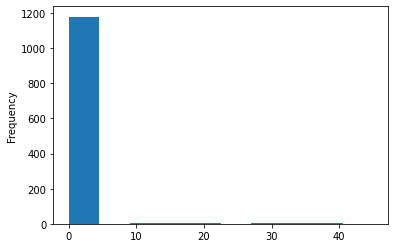

In [166]:
df['idle_men'].plot(kind = 'hist')

In [167]:
df['no_of_style_change'].value_counts()

0    1050
1     114
2      33
Name: no_of_style_change, dtype: int64

**The data of idle_time and idle_men are mostly 0, they could be not very valuable for the data analysis, prediction and should be dropped**

In [168]:
#Drop datetime data
df.drop(columns = ['date'], inplace = True)

In [169]:
#Assign Dummies Data
df = pd.get_dummies(df,drop_first=True, columns=['day', 'department', 'quarter','team'])

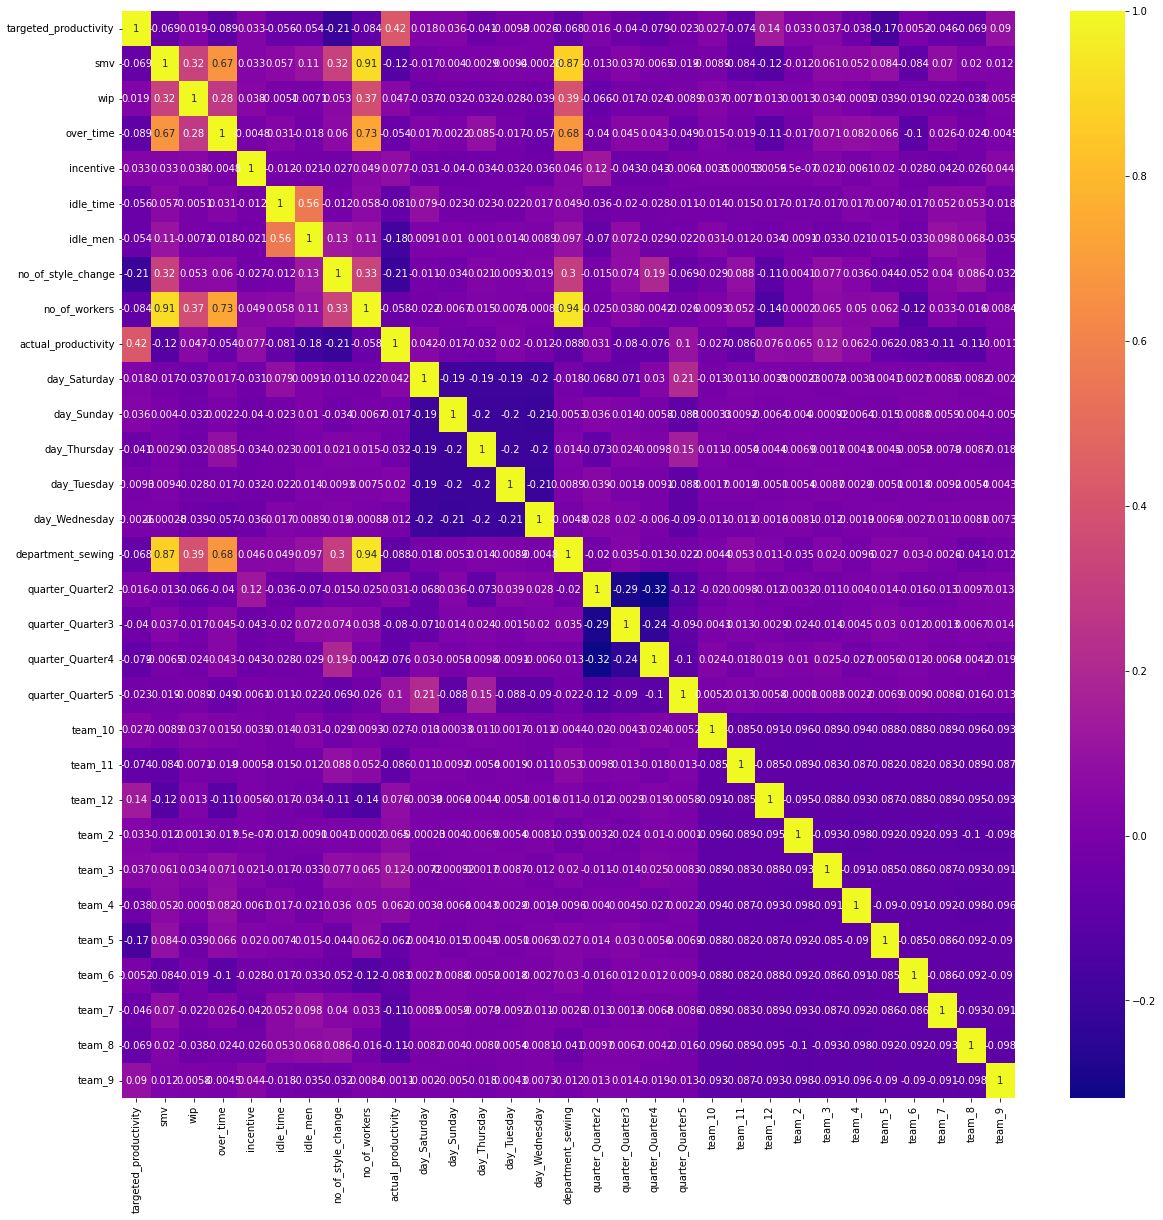

In [170]:
corr_matrix  = df.corr()

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='plasma', annot_kws={"size": 10})
plt.show()

**There are some features showing multicollinearity which should be removed**

In [171]:
#Remove multicollinearity
columns_to_remove = ['no_of_workers', 'department_sewing'] #multicollinearity with smv

#Remove features with high frequency of 0 data
columns_to_remove.append('idle_time')
columns_to_remove.append('idle_men')

df.drop(columns=columns_to_remove, inplace=True)

df.head()

,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,actual_productivity,day_Saturday,day_Sunday,day_Thursday,...,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
0,0.80,26.16,1108.0,7080,98,0,0.940725,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,0.75,3.94,0.0,960,0,0,0.886500,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0.80,11.41,968.0,3660,50,0,0.800570,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3,0.80,11.41,968.0,3660,50,0,0.800570,0,0,1,...,0,1,0,0,0,0,0,0,0,0
4,0.80,25.90,1170.0,1920,50,0,0.800382,0,0,1,...,0,0,0,0,0,0,1,0,0,0


#### **2. Based on the training data, create three supervised machine learning (ML) models for predicting actual_productivity.**

In [172]:
from sklearn.preprocessing import StandardScaler

#standardize the dataset
scaler = StandardScaler()
scaler.fit(df)

scaled_df = pd.DataFrame(scaler.transform(df), columns=df.columns, dtype='float64')

In [173]:
#Check the scaled dataframe
scaled_df.head()

,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,actual_productivity,day_Saturday,day_Sunday,day_Thursday,...,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
0,0.719137,1.014552,0.277930,0.750589,0.373414,-0.351617,1.178994,-0.430289,-0.451913,2.239436,...,-0.281693,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,3.159375,-0.308465
1,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.351617,0.868096,-0.430289,-0.451913,2.239436,...,-0.281693,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,-0.316518,-0.308465
2,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.351617,0.375423,-0.430289,-0.451913,2.239436,...,3.549968,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,-0.316518,-0.308465
3,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.351617,0.375423,-0.430289,-0.451913,2.239436,...,-0.281693,3.330302,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,-0.316518,-0.308465
4,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.351617,0.374342,-0.430289,-0.451913,2.239436,...,-0.281693,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,3.425499,-0.295285,-0.316518,-0.308465


In [174]:
#Split features and labels
X = scaled_df.drop(['actual_productivity'], axis = 1)
y = scaled_df['actual_productivity']

In [175]:
X.head()

,targeted_productivity,smv,wip,over_time,incentive,no_of_style_change,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,...,team_11,team_12,team_2,team_3,team_4,team_5,team_6,team_7,team_8,team_9
0,0.719137,1.014552,0.277930,0.750589,0.373414,-0.351617,-0.430289,-0.451913,2.239436,-0.44923,...,-0.281693,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,3.159375,-0.308465
1,0.208151,-1.016778,-0.453931,-1.077682,-0.238643,-0.351617,-0.430289,-0.451913,2.239436,-0.44923,...,-0.281693,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,-0.316518,-0.308465
2,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.351617,-0.430289,-0.451913,2.239436,-0.44923,...,3.549968,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,-0.316518,-0.308465
3,0.719137,-0.333878,0.185457,-0.271092,0.073631,-0.351617,-0.430289,-0.451913,2.239436,-0.44923,...,-0.281693,3.330302,-0.316518,-0.29361,-0.310087,-0.29024,-0.291928,-0.295285,-0.316518,-0.308465
4,0.719137,0.990783,0.318882,-0.790895,0.073631,-0.351617,-0.430289,-0.451913,2.239436,-0.44923,...,-0.281693,-0.300273,-0.316518,-0.29361,-0.310087,-0.29024,3.425499,-0.295285,-0.316518,-0.308465


In [176]:
y.head()

0    1.178994
1    0.868096
2    0.375423
3    0.375423
4    0.374342
Name: actual_productivity, dtype: float64

In [177]:
print(X.shape)
print(y.shape)

(1197, 26)
(1197,)


In [178]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, mean_absolute_error, accuracy_score, mean_squared_error, r2_score

In [179]:
#Split train and test dataset
X_train,  X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, random_state=101)

* **Build linear regression model**

In [180]:
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()

lr_model.fit(X_train, y_train)

#function to print scores
def evaluate_model(model):
    print(f'Test Data - Mean absolute error: {mean_absolute_error(y_test, model.predict(X_test)):.2f}')
    print(f'Train Data - Mean absolute error: {mean_absolute_error(y_train, model.predict(X_train)):.2f}')
    print(f'Test Data - Mean squared error:{mean_squared_error(y_test, model.predict(X_test)):.2f}')
    print(f'Train Data - Mean squared error:{mean_squared_error(y_train, model.predict(X_train)):.2f}')
    print(f'Test Data - Root mean squared error: {np.sqrt(mean_squared_error(y_test, model.predict(X_test))):.2f}')
    print(f'Train Data - Root mean squared error: {np.sqrt(mean_squared_error(y_train, model.predict(X_train))):.2f}')
    print(f'Test Data - R2 score: {r2_score(y_test, model.predict(X_test)):.2f}')
    print(f'Train Data - R2 score: {r2_score(y_train, model.predict(X_train)):.2f}')
                                              

In [181]:
evaluate_model(lr_model)

Test Data - Mean absolute error: 0.62
Train Data - Mean absolute error: 0.61
Test Data - Mean squared error:0.81
Train Data - Mean squared error:0.69
Test Data - Root mean squared error: 0.90
Train Data - Root mean squared error: 0.83
Test Data - R2 score: 0.21
Train Data - R2 score: 0.30


* **Build decision tree model**

In [182]:
from sklearn.tree import DecisionTreeRegressor

In [183]:
dtr_model = DecisionTreeRegressor()

In [184]:
dtr_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [185]:
evaluate_model(dtr_model)

Test Data - Mean absolute error: 0.52
Train Data - Mean absolute error: 0.00
Test Data - Mean squared error:0.92
Train Data - Mean squared error:0.00
Test Data - Root mean squared error: 0.96
Train Data - Root mean squared error: 0.01
Test Data - R2 score: 0.10
Train Data - R2 score: 1.00


* **Build Random Forest Regression model**

In [186]:
from sklearn.ensemble import RandomForestRegressor

In [187]:
rf_model = RandomForestRegressor()

In [188]:
rf_model.fit(X_train, y_train)

RandomForestRegressor()

In [189]:
evaluate_model(rf_model)

Test Data - Mean absolute error: 0.45
Train Data - Mean absolute error: 0.17
Test Data - Mean squared error:0.60
Train Data - Mean squared error:0.08
Test Data - Root mean squared error: 0.77
Train Data - Root mean squared error: 0.28
Test Data - R2 score: 0.42
Train Data - R2 score: 0.92


#### **3.From the results we can see that decision tree model and random forest are overfitting. Let's do some hyperparameter tunning**

* **Hyperparameter tunning for decision tree regression model**

In [190]:
#find tree max depth
dtr_model.tree_.max_depth

22

In [191]:
dt_scores = pd.DataFrame(columns=['Max depth', 'Train Data', 'Test Data'])

In [192]:
#Find the suitable max_depth
for i in range(1, 25):
    dtr_model = DecisionTreeRegressor(max_depth=i, random_state=42)
    dtr_model.fit(X_train,y_train)
    train_score = dtr_model.score(X_train, y_train).round(2)
    test_score = dtr_model.score(X_test, y_test).round(2)
    new_row = pd.DataFrame({'Max depth': i, 'Train Data':train_score, 'Test Data': test_score}, index=[0])
    dt_scores = dt_scores.append(new_row, ignore_index=True)

In [193]:
dt_scores

,Max depth,Train Data,Test Data
0,1,0.17,0.15
1,2,0.26,0.20
2,3,0.37,0.31
3,4,0.46,0.33
4,5,0.52,0.26
5,6,0.57,0.30
6,7,0.62,0.24
7,8,0.67,0.25
8,9,0.74,0.21
9,10,0.80,0.20


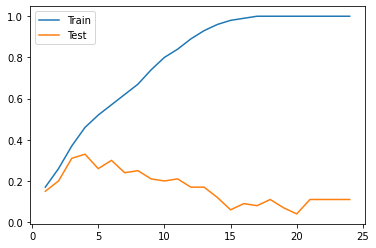

In [194]:
plt.plot(dt_scores['Max depth'], dt_scores['Train Data'], label = 'Train')
plt.plot(dt_scores['Max depth'], dt_scores['Test Data'], label = 'Test')
plt.legend()
plt.show()


We can see that at depth = 3, the scores for train and test data start splitting. We are going to use max depth as 3

In [195]:
#Hyperparameter tuning using Grid Search

from sklearn.model_selection import GridSearchCV

max_depth = [3]
# Minimum samples to split
min_samples_split = [2,5,10,20]
# Minimum samples of each leaf
min_samples_leaf = [5, 10, 20, 50, 100]
#criterion
criterion = ['squared_error', 'poisson', 'absolute_error', 'friedman_mse']

params = {
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'criterion': criterion
}

dtr_model = DecisionTreeRegressor()

grid_search = GridSearchCV(estimator=dtr_model, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = 'r2')

In [196]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 80 candidates, totalling 320 fits


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
80 fits failed out of a total of 320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
80 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py", line 1247, in fit
    super().fit(
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packag

GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'criterion': ['squared_error', 'poisson',
                                       'absolute_error', 'friedman_mse'],
                         'max_depth': [3],
                         'min_samples_leaf': [5, 10, 20, 50, 100],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='r2', verbose=1)

In [197]:
#Return the model with best tuning
grid_search.best_estimator_

DecisionTreeRegressor(max_depth=3, min_samples_leaf=10)

In [198]:
#Get the score after tuning
dtr_model = grid_search.best_estimator_

evaluate_model(dtr_model)

Test Data - Mean absolute error: 0.55
Train Data - Mean absolute error: 0.56
Test Data - Mean squared error:0.71
Train Data - Mean squared error:0.62
Test Data - Root mean squared error: 0.84
Train Data - Root mean squared error: 0.79
Test Data - R2 score: 0.31
Train Data - R2 score: 0.37


* **Hyperparameter tunning for Random Forest**

In [199]:
#Random Search Cross Validation to find the best parameters
from sklearn.model_selection import RandomizedSearchCV

#Number of trees
n_estimators = np.arange(10,1000,10)
#Number of features
max_features = [None, 'sqrt', 'log2']
# Max depth level of the search trees
max_depth = np.arange(1,100,5)
# Minimum samples to split
min_samples_split = [2, 5, 10]
# Minimum samples of each leaf
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Random search grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
               }

In [200]:
#build random forest model using the random grid
rf_model = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf_model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': array([ 1,  6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61, 66, 71, 76, 81,
       86, 91, 96]),
                                        'max_features': [None, 'sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 17..., 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390,
       400, 410, 420, 430, 440, 450, 460, 470, 480, 490, 500, 510, 520,
       530, 540, 550, 560, 570, 580, 590, 600, 610, 620, 630, 640, 650,
       660, 670, 680, 690, 700, 710, 720, 730, 740, 750, 760, 770, 780,
       790, 800, 810, 820, 830, 840, 850, 860, 870, 880, 890, 900, 910,
       920, 930, 940, 950, 960, 970, 980, 990])},
                   random_state=42, verbose=2)

In [201]:
#Get the best parameters
rf_random.best_estimator_

RandomForestRegressor(max_depth=16, max_features=None, min_samples_leaf=4,
                      min_samples_split=5, n_estimators=810)

In [202]:
rf_model = rf_random.best_estimator_
evaluate_model(rf_model)

Test Data - Mean absolute error: 0.45
Train Data - Mean absolute error: 0.34
Test Data - Mean squared error:0.59
Train Data - Mean squared error:0.29
Test Data - Root mean squared error: 0.77
Train Data - Root mean squared error: 0.54
Test Data - R2 score: 0.43
Train Data - R2 score: 0.71


* **Apply regularization using Lasso and Ridge**

In [203]:
from sklearn.linear_model import Lasso, Ridge

In [204]:
#Lasso Regularization
las_reg = Lasso()
las_reg.fit(X_train, y_train)

Lasso()

In [205]:
evaluate_model(las_reg)

Test Data - Mean absolute error: 0.78
Train Data - Mean absolute error: 0.77
Test Data - Mean squared error:1.03
Train Data - Mean squared error:0.99
Test Data - Root mean squared error: 1.01
Train Data - Root mean squared error: 0.99
Test Data - R2 score: -0.00
Train Data - R2 score: 0.00


In [206]:
#Ridge Regularization

rid_reg = Ridge()
rid_reg.fit(X_train, y_train)


Ridge()

In [207]:
evaluate_model(rid_reg)

Test Data - Mean absolute error: 0.62
Train Data - Mean absolute error: 0.61
Test Data - Mean squared error:0.81
Train Data - Mean squared error:0.69
Test Data - Root mean squared error: 0.90
Train Data - Root mean squared error: 0.83
Test Data - R2 score: 0.21
Train Data - R2 score: 0.30


* **3.Analyse the importance of the features for predicting actual_productivity using two different approaches. Give statistical reasons of your findings.**

In [214]:
from sklearn.inspection import permutation_importance

Text(0.5, 0, 'Feature Importance')

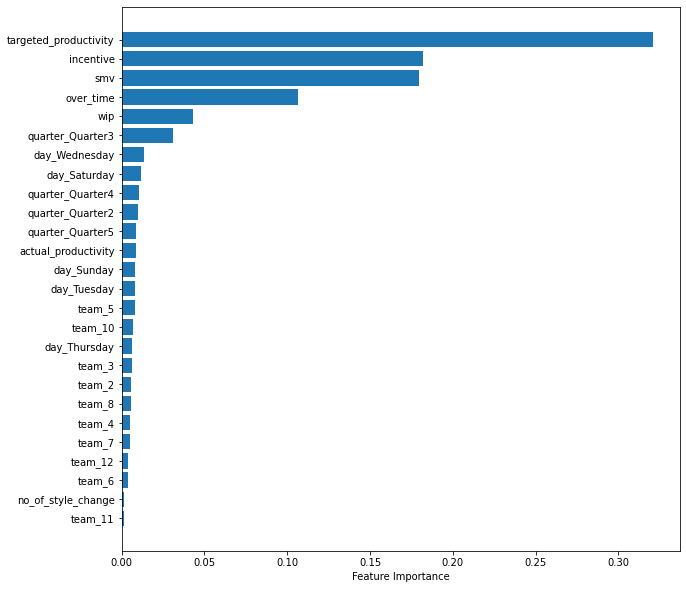

In [210]:
#Feature importance using random forest with built-in feature importance function
features_sorted = rf_model.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(10,10))
plt.barh(scaled_df.columns[features_sorted], rf_model.feature_importances_[features_sorted])
plt.xlabel("Feature Importance")

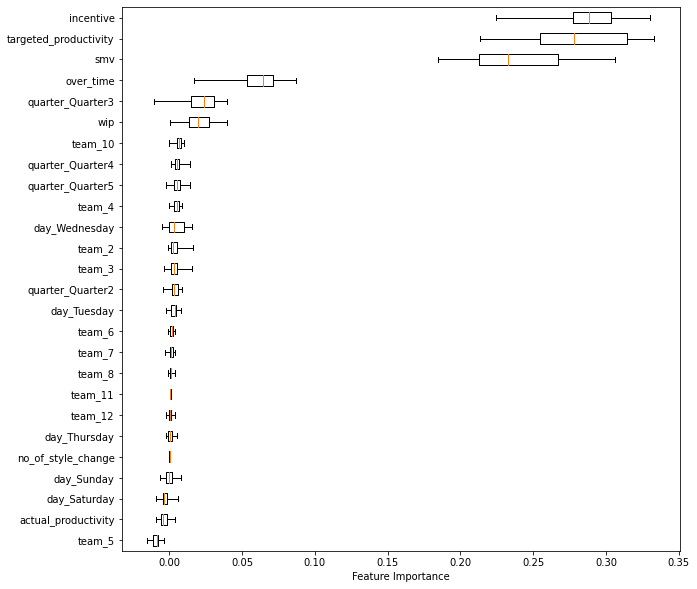

In [234]:
#Feature importance using permutation
sorted_idx = per.importances_mean.argsort()
importances = pd.DataFrame(
    per.importances[sorted_idx].T,
    columns=scaled_df.columns[sorted_idx],
)

fig, ax = plt.subplots(figsize=(10,10))
plt.boxplot(importances, labels = importances.columns, vert=False, whis = 10)
plt.xlabel("Feature Importance")
plt.show()

The feature importance was analysed using random forest model with built-in feature importance function and permutation method. With both methods, the targeted productivity, incentive and standard minute value are the 3 most important features which really make sense. However, with built-in feature importance function which uses Gini and Mean Decrease Accuracy, targeted_productivity is domninat comparing the other two (almost double). In contrast, with permutation method, incentive is most important feature and closely following by targeted_productivity and smv.